In [1]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import umap.umap_ as umap
#import sweetviz #usado mais pra dados rotulados
import dtale
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

D:\Pessoais\AnacondaFiles\envs\teste_with_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\1_Preprocessing\\DatasetsJoined"
columnsName = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]
columnsName2 = ["TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","culture_day","c_type"]

columnsName3 = ["L1-TGS826","L2-TGS826","L3-TGS826","L1-TGS2611","L2-TGS2611","L3-TGS2611",
                "L1-TGS2603","L2-TGS2603","L3-TGS2603","L1-TGS813","L2-TGS813","L3-TGS813",
                "L1-TGS822","L2-TGS822","L3-TGS822","L1-TGS2602","L2-TGS2602","L3-TGS2602",
                "L1-TGS823","L2-TGS823","L3-TGS823", "L1-temperatura", "L2-temperatura", "L3-temperatura",
                "L1-pressao", "L2-pressao", "L3-pressao","L1-umidade","L2-umidade","L3-umidade",
                "c_type","culture_day"
               ]
columnsName4 = ["L1-TGS826","L2-TGS826","L3-TGS826","L1-TGS2611","L2-TGS2611","L3-TGS2611",
                "L1-TGS2603","L2-TGS2603","L3-TGS2603","L1-TGS813","L2-TGS813","L3-TGS813",
                "L1-TGS822","L2-TGS822","L3-TGS822","L1-TGS2602","L2-TGS2602","L3-TGS2602",
                "L1-TGS823","L2-TGS823","L3-TGS823","c_type","culture_day"
               ]

In [5]:
#Load albicans file data ,"c_type"
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6
df_all_albicans        = pd.read_csv(rootPath+"\\AllAlbicansCollect.csv", sep=",")
df_all_glabrata        = pd.read_csv(rootPath+"\\AllGlabrataCollect.csv", sep=",")
df_all_haemulonii      = pd.read_csv(rootPath+"\\AllHaemuloniiCollect.csv", sep=",")
df_all_kodamaea_ohmer = pd.read_csv(rootPath+"\\AllKodamaea_ohmerCollect.csv", sep=",")
df_all_krusei          = pd.read_csv(rootPath+"\\AllKruseiCollect.csv", sep=",")
df_all_parapsilosis    = pd.read_csv(rootPath+"\\AllParapsilosisCollect.csv", sep=",")

In [6]:
#Join the albicans dataframes
frames  = [df_all_albicans,df_all_glabrata, df_all_haemulonii, df_all_kodamaea_ohmer, df_all_krusei,df_all_parapsilosis]
df_all_candidas_joined = pd.concat(frames)
df_all_candidas_joined.reset_index(drop=True,inplace=True)

In [7]:
df_all_candidas_joined

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623161e+09,91720.0,7305.0,6014.0,63460.0,4294.0,40700.0,8005.0,60.66,100.22,12.59,1,1
1,1,1.623161e+09,91910.0,7305.0,6020.0,63380.0,4293.0,40730.0,7998.0,60.71,100.15,12.52,1,1
2,2,1.623161e+09,91190.0,7305.0,6020.0,63460.0,4294.0,40750.0,7998.0,60.70,100.19,12.56,1,1
3,3,1.623161e+09,92380.0,7305.0,6020.0,64470.0,4319.0,40770.0,7998.0,60.69,83.83,12.60,1,1
4,4,1.623161e+09,35120.0,7305.0,7841.0,64730.0,2047.0,16630.0,7032.0,60.62,74.81,11.56,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64962,2381,1.623262e+09,87790.0,7171.0,8935.0,38260.0,2307.0,15180.0,7706.0,57.33,54.08,7.23,6,2
64963,2382,1.623262e+09,86770.0,7171.0,8941.0,38200.0,2305.0,15180.0,7710.0,57.32,54.00,7.25,6,2
64964,2383,1.623262e+09,87190.0,7171.0,8941.0,38260.0,2307.0,15180.0,7704.0,57.30,54.08,7.40,6,2
64965,2384,1.623262e+09,87190.0,7171.0,8941.0,38330.0,2297.0,15170.0,7706.0,57.29,54.08,7.25,6,2


In [8]:
# Comment this code when needed to use data set to data visualization
# from sklearn.utils import shuffle
# df_all_candidas_joined = shuffle(df_all_candidas_joined)
# #df_all_candidas_joined= df_all_candidas_joined.drop(columns=['temperatura','pressao','umidade'])
# df_all_candidas_joined

In [9]:
x = np.array(df_all_candidas_joined.drop)

In [10]:
df_all_candidas_joined.to_csv(r'NewDatasets\AllCandidasCollect.csv', index = False)

In [11]:
#sns.pairplot(df_all_candidas_joined, hue='c_type')

In [12]:
# all_candidas_data = df_all_candidas_joined.drop(columns=['c_type'])
# scaled_all_candidas_df = StandardScaler().fit_transform(all_candidas_data)
# scaled_all_candidas_df

In [13]:
df_all_candidas_joined = df_all_candidas_joined.drop([17828])
df_all_candidas_joined = df_all_candidas_joined.drop(columns=['timestamp','index'])
df_all_candidas_joined.reset_index(inplace=True)
columnsName = df_all_candidas_joined.columns.values

In [14]:
df_all_candidas_joined.dropna(inplace=True)
df_all_candidas_joined = df_all_candidas_joined.drop(columns=['index','umidade','pressao','temperatura'])
df_all_candidas_joined

,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,c_type,culture_day
0,91720.0,7305.0,6014.0,63460.0,4294.0,40700.0,8005.0,1,1
1,91910.0,7305.0,6020.0,63380.0,4293.0,40730.0,7998.0,1,1
2,91190.0,7305.0,6020.0,63460.0,4294.0,40750.0,7998.0,1,1
3,92380.0,7305.0,6020.0,64470.0,4319.0,40770.0,7998.0,1,1
4,35120.0,7305.0,7841.0,64730.0,2047.0,16630.0,7032.0,1,1
...,...,...,...,...,...,...,...,...,...
64961,87790.0,7171.0,8935.0,38260.0,2307.0,15180.0,7706.0,6,2
64962,86770.0,7171.0,8941.0,38200.0,2305.0,15180.0,7710.0,6,2
64963,87190.0,7171.0,8941.0,38260.0,2307.0,15180.0,7704.0,6,2
64964,87190.0,7171.0,8941.0,38330.0,2297.0,15170.0,7706.0,6,2


In [15]:
def adjust_data(dataFrame):
    maxLine = 3
    index = 0
    indexNewData = 0
    newDataFrame = pd.DataFrame(columns=columnsName4)
    for i in range(len(dataFrame)):
        for j, col in enumerate(dataFrame.columns):
            value = dataFrame.iloc[i][j]
            if col == "c_type" or col == "culture_day":
                newDataFrame.loc[indexNewData, col] = value
            else:
                newDataFrame.loc[indexNewData,f'L{index+1}-{col}'] = value
        index=index+1
        if index>=maxLine:
            #print(newDataFrame.loc[indexNewData])
            indexNewData= indexNewData+1
            index=0
    return newDataFrame
newDataFrame= adjust_data(df_all_candidas_joined)
newDataFrame = newDataFrame.dropna()

In [16]:
df_all_candidas_joined = newDataFrame.copy()

In [17]:
# import dtale
# d = dtale.show(df_all_candidas_joined.drop(columns=['index','timestamp']))
# d.open_browser()

In [18]:
X = df_all_candidas_joined.drop(columns=['c_type'])
y = df_all_candidas_joined['c_type']

In [19]:
X 

,L1-TGS826,L2-TGS826,L3-TGS826,L1-TGS2611,L2-TGS2611,L3-TGS2611,L1-TGS2603,L2-TGS2603,L3-TGS2603,L1-TGS813,...,L1-TGS822,L2-TGS822,L3-TGS822,L1-TGS2602,L2-TGS2602,L3-TGS2602,L1-TGS823,L2-TGS823,L3-TGS823,culture_day
0,91720.0,91910.0,91190.0,7305.0,7305.0,7305.0,6014.0,6020.0,6020.0,63460.0,...,4294.0,4293.0,4294.0,40700.0,40730.0,40750.0,8005.0,7998.0,7998.0,1.0
1,92380.0,35120.0,21720.0,7305.0,7305.0,27490.0,6020.0,7841.0,15190.0,64470.0,...,4319.0,2047.0,610.2,40770.0,16630.0,2893.0,7998.0,7032.0,3892.0,1.0
2,19610.0,19620.0,20120.0,45670.0,51900.0,54700.0,15440.0,15390.0,15370.0,63460.0,...,328.9,248.3,219.0,1625.0,1244.0,1074.0,2985.0,2667.0,2520.0,1.0
3,20690.0,21150.0,21550.0,56330.0,57480.0,58320.0,15320.0,15270.0,15180.0,61280.0,...,207.9,200.3,199.8,980.4,920.8,883.0,2435.0,2377.0,2332.0,1.0
4,21920.0,22250.0,22600.0,58950.0,59460.0,60090.0,15100.0,15010.0,14910.0,60290.0,...,199.8,199.8,200.3,856.3,839.0,820.5,2300.0,2275.0,2245.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21650,87010.0,87130.0,86180.0,7143.0,7143.0,7143.0,8897.0,8897.0,8897.0,37790.0,...,2323.0,2324.0,2324.0,15250.0,15240.0,15230.0,7708.0,7706.0,7710.0,2.0
21651,86770.0,87190.0,87190.0,7150.0,7150.0,7164.0,8916.0,8910.0,8904.0,37880.0,...,2323.0,2318.0,2313.0,15230.0,15230.0,15220.0,7708.0,7706.0,7708.0,2.0
21652,87190.0,87130.0,87130.0,7164.0,7164.0,7164.0,8916.0,8916.0,8916.0,38010.0,...,2315.0,2313.0,2310.0,15220.0,15210.0,15230.0,7712.0,7708.0,7700.0,2.0
21653,87010.0,87550.0,87790.0,7171.0,7171.0,7171.0,8916.0,8922.0,8935.0,38100.0,...,2308.0,2308.0,2307.0,15200.0,15200.0,15180.0,7704.0,7706.0,7706.0,2.0


In [20]:
Y = df_all_candidas_joined[["c_type"]]
Y.value_counts()

c_type
1.0       4788
2.0       4324
5.0       3991
6.0       3987
4.0       2296
3.0       2269
dtype: int64

<AxesSubplot:xlabel='c_type', ylabel='count'>

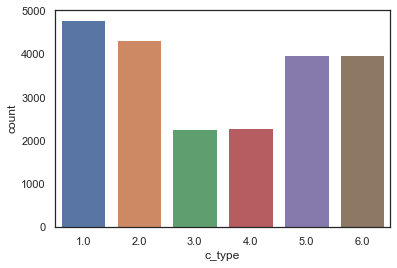

In [21]:
%matplotlib inline
sns.countplot(x="c_type", data=Y)

In [22]:
plt.show()

In [23]:
oversample = RandomUnderSampler(random_state=42)
        #Fazer isso com dados apenas de treinamento
X_train = X
y_train = Y
print(f" OverSampler: {len(np.unique(y_train))}")
for i in range(len(np.unique(y_train))):
    oversample.fit(X_train,y_train)
    x_res , y_res = oversample.fit_resample(X_train,y_train)
    y_train = y_res
    X_train = x_res

 OverSampler: 6


ValueError: Unknown label type: 'unknown'

In [ ]:
y_train.value_counts()

In [ ]:
len(y_train)

In [ ]:
sns.countplot(x="c_type", data=y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.80, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

In [ ]:
AllCandidas_TRAIN = X_train
AllCandidas_VAL= X_val
AllCandidas_TEST = X_test

AllCandidas_TEST['species'] = y_test
AllCandidas_VAL['species'] = y_val
AllCandidas_TRAIN['species'] = y_train

In [ ]:
newColumns = ["L1-TGS826","L2-TGS826","L3-TGS826","L1-TGS2611","L2-TGS2611","L3-TGS2611",
                "L1-TGS2603","L2-TGS2603","L3-TGS2603","L1-TGS813","L2-TGS813","L3-TGS813",
                "L1-TGS822","L2-TGS822","L3-TGS822","L1-TGS2602","L2-TGS2602","L3-TGS2602",
                "L1-TGS823","L2-TGS823","L3-TGS823",'culture_day','species'
               ]
AllCandidas_TRAIN = AllCandidas_TRAIN[newColumns]
AllCandidas_TRAIN

In [ ]:
AllCandidas_VAL = AllCandidas_VAL[newColumns]
AllCandidas_VAL

In [ ]:
AllCandidas_TEST = AllCandidas_TEST[newColumns]
AllCandidas_TEST

In [ ]:
AllCandidas_TRAIN.to_csv(r'NewDatasets\AllCandidas_TRAIN_V3.csv', index = False, header=False)
AllCandidas_VAL.to_csv(r'NewDatasets\AllCandidas_VAL_V3.csv', index = False, header=False)
AllCandidas_TEST.to_csv(r'NewDatasets\AllCandidas_TEST_V3.csv', index = False, header=False)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
new_x_test = pca.transform(X_test)
new_result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

In [ ]:
print(len(X_train))
print(len(y_train))

In [ ]:
y_train_2 = y_train.reset_index()
y_train_2 = y_train_2.drop(columns=['index'])
y_train_2

In [ ]:
new_result
#df_all_candidas_joined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_result = pd.DataFrame(scaler.fit_transform(new_result), columns=["PCA0","PCA1","PCA2"])
new_result

In [ ]:
new_result["species"] = y_train_2
new_result

In [ ]:
%matplotlib inline

In [ ]:
# Plot initialisation

fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_result['PCA0'], new_result['PCA1'], new_result['PCA2'], c=y_train, cmap="RdYlGn_r", s=50, ec='black')
 
# make simple, bare axis lines through space:
xAxisLine = ((min(new_result['PCA0']), max(new_result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(new_result['PCA1']), max(new_result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(new_result['PCA2']), max(new_result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the WearableComputing set")
plt.show()

In [ ]:
new_result.to_csv(r'NewDatasets\AllCandidas_TRAIN_PCA.csv', index = False, header=False)
new_result

In [ ]:
new_result["species"].value_counts()

In [ ]:
df_all_candidas_joined

In [ ]:
# all_candidas_data = all_candidas_data.drop(columns=['index'])
# all_candidas_data

In [ ]:
df_all_candidas_joined.loc[:'TGS826'].values

In [ ]:
d = dtale.show(df_all_candidas_joined)
d.open_browser()

In [ ]:
def generate_plot(DATASET,c_type):
	#DATASET = pd.read_csv('clean_aspergillus.csv', delimiter='\t')
	#DATASET = DATASET.drop(['COLUMN1', 'COLUMN2', 'TIMESTAMP'], axis=1)

	fig, axs = plt.subplots(10)
	legend = ['TGS826', 'TGS2611', 'TGS2603', 'TGS813', 
		'TGS822', 'TGS2602', 'TGS823', 'temperatura', 'pressao',
		'umidade']
	colors = ['blue', 'orange', 'green', 'red', 'purple', 
		'brown', 'pink', 'gray', 'olive', 'cyan']
	for index, ax in enumerate(axs):
		sensor = legend[index]
		x = range(0, len(DATASET[sensor]))
		ax.plot(x, DATASET[sensor], 'tab:' + colors[index])
		ax.set(xlabel='Point')
		if index == 0:
			ax.set_title(f'Time series plot - {c_type}')
		if sensor == 'temperatura':
			ax.set(ylabel='Tem(°C)')
		elif sensor == 'Pressao':
			ax.set(ylabel='Pre(kPa)')
		elif sensor == 'umidade':
			ax.set(ylabel='Umi(%)')
		else:
			ax.set(ylabel='Ohm')
		ax.legend([sensor])
		ax.grid(True)
		ax.label_outer()
	plt.show()

In [ ]:
df_all_candidas_joined[df_all_candidas_joined['c_type'] == 1]

In [ ]:
def f(x):
    return {
         1: "Albicans",
         2: "Glabrata",
         3: "Haemulonii",
         4: "Kodamaea_ohmeri",
         5: "Krusei",
         6: "Parapsilosis"
    }[x]


In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

for i, item in enumerate(df_all_candidas_joined['c_type'].unique()):
    df_chart = df_all_candidas_joined[df_all_candidas_joined['c_type'] == item]
    generate_plot(df_chart,f(item))

In [ ]:
for i, item in enumerate(df_all_candidas_joined['c_type'].unique()):
    for j, day in enumerate(df_all_candidas_joined['culture_day'].unique()):
        df_chart = df_all_candidas_joined[(df_all_candidas_joined['culture_day'] == day) & (df_all_candidas_joined['c_type'] == item)]
        generate_plot(df_chart,f(item))

In [ ]:
all_candidas_data2 = df_all_candidas_joined.drop(columns=['c_type'])
all_candidas_data2

In [ ]:
import dtale

scaled_all_candidas_df = pd.DataFrame(data=StandardScaler().fit_transform
                                      (all_candidas_data2), 
                                      columns=all_candidas_data2.columns)
#scaled_all_candidas_df['c_type'] = df_all_candidas_joined['c_type']
#scaled_all_candidas_df['index'] = all_candidas_data['index']
scaled_all_candidas_df.reset_index(drop=True,inplace=True)
scaled_all_candidas_df.dropna(inplace=True)
scaled_all_candidas_df

In [ ]:
# scaled_all_candidas_df.drop(columns=['index'],inplace=True)
# scaled_all_candidas_df

In [ ]:
#sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})

In [ ]:
d = dtale.show(scaled_all_candidas_df)
d.open_browser()

In [ ]:
df_all_candidas_joined.columns.values

In [ ]:
reducer = umap.UMAP(n_components=3)

In [ ]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_all_candidas_df)
embedding.shape

In [ ]:
all_candidas_data2

In [ ]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=df_all_candidas_joined.c_type, cmap="tab10", s=30)
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["C. Albicans", "C.Glabrata","C. Haemulonii","C. Kodamaea_ohmeri", "C. Krusei","C. Parapsilosis"], loc="upper right", title="Candidas types")

# make simple, bare axis lines through space:
xAxisLine = ((min(embedding[:, 0]), max(embedding[:, 0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(embedding[:, 1]), max(embedding[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(embedding[:, 2]), max(embedding[:, 2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("UMAP projection from All Candidas dataset")

In [ ]:
# d = dtale.show(embedding)
# d.open_browser()

In [ ]:
#Usa as classes do array original pra plotar a 
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6
ax= sns.scatterplot(
    embedding[:, 0],
    embedding[:, 1],
    hue= df_all_candidas_joined.c_type , s=15, cmap="tab10")
plt.gca().set_aspect('equal', 'datalim')
handles, labels  =  ax.get_legend_handles_labels()
#"C. Albicans", "C.Glabrata","C. Haemulonii","C. Albicans", "C.Glabrata","C. Haemulonii"
plt.legend(handles, ["C. Albicans", "C.Glabrata","C. Haemulonii","C. Kodamaea_ohmeri", "C. Krusei","C. Parapsilosis"], loc='lower right')
plt.title('UMAP projection of the All Candidas dataset', fontsize=24)
plt.show

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_all_candidas_joined.c_type, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)).set_ticks(np.arange(7))
plt.title('UMAP projection of the All Candidas dataset', fontsize=24);

In [ ]:
scaled_all_candidas_df

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_all_candidas_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

In [ ]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_all_candidas_joined.c_type, cmap="tab10", s=30)
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["C. Albicans", "C.Glabrata","C. Haemulonii","C. Kodamaea_ohmeri", "C. Krusei","C. Parapsilosis"], loc="upper right", title="Candidas types")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection from All Candidas dataset")

In [ ]:
components_df =  pd.DataFrame(abs(pca.components_[:3]),columns=scaled_all_candidas_df.columns,
                             index=['PCA1','PCA2','PCA3'])
components_df

#
# ['blue', 'orange', 'green', 'red', 'purple', 
#		'brown', 'pink', 'gray', 'olive', 'cyan']

In [ ]:
d = dtale.show(components_df)
d.open_browser()

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_all_candidas_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1'])

In [ ]:
ax = sns.scatterplot(data=result, x='PCA0', y='PCA1',cmap="tab10", s=50, c=df_all_candidas_joined.c_type)
handles, labels  =  ax.get_legend_handles_labels()
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["C. Albicans", "C.Glabrata","C. Haemulonii","C. Kodamaea_ohmeri", "C. Krusei","C. Parapsilosis"], loc="lower right", title="Candidas types")
plt.title('PCA projection from All Candidas dataset', fontsize=24)